In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#2. 打开csv数据
with open('Data_O2_Oxidation_3.csv', encoding = 'UTF-8') as f:
    df = pd.read_csv(f)  #index_col=0 告诉第一列是索引
df
#first_column_header = df.columns[0]
#print(first_column_header)

,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,C_c,BETs,AcCom,OxiStat,rpm,NaOH_c,Yld
0,3.0,97.0,0.0,46.50,20.0,10.0,120,60,0.0,Missing,Missing,Missing,400,2.0,0.019780
1,3.0,97.0,0.0,46.50,20.0,10.0,150,60,0.0,Missing,Missing,Missing,400,2.0,0.034730
2,3.0,97.0,0.0,46.50,20.0,10.0,160,60,0.0,Missing,Missing,Missing,400,2.0,0.048530
3,3.0,97.0,0.0,46.50,20.0,10.0,170,60,0.0,Missing,Missing,Missing,400,2.0,0.036800
4,3.0,97.0,0.0,46.50,20.0,10.0,200,60,0.0,Missing,Missing,Missing,400,2.0,0.034730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1.2,30.4,68.4,38.48,50.0,4.0,150,30,0.0,Missing,Missing,Missing,800,2.0,0.011905
235,1.2,30.4,68.4,38.48,50.0,4.0,150,30,1.0,21.988,CuO,2,800,2.0,0.015186
236,1.2,30.4,68.4,38.48,50.0,4.0,150,30,1.5,21.988,CuO,2,800,2.0,0.015605
237,1.2,30.4,68.4,38.48,50.0,4.0,150,30,2.0,21.988,CuO,2,800,2.0,0.015954


In [2]:
# 分割数据
df_O2_noC = df[df['C_c'] == 0]  # "C_c"列值为0的所有行   【行号不变的！】
df_O2_C = df[df['C_c'] != 0]  # "C_c"列值不为0的所有行

In [3]:
# 假设我们要删除的列是 'BETs', 'AcCom', 和 'OxiStat'
df_O2_noC = df_O2_noC.drop(['C_c', 'BETs', 'AcCom', 'OxiStat'], axis=1)

# 查看结果
df_O2_noC  #【行号不变的！】


,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,rpm,NaOH_c,Yld
0,3.0,97.0,0.0,46.50,20.0,10.0,120,60,400,2.0,0.019780
1,3.0,97.0,0.0,46.50,20.0,10.0,150,60,400,2.0,0.034730
2,3.0,97.0,0.0,46.50,20.0,10.0,160,60,400,2.0,0.048530
3,3.0,97.0,0.0,46.50,20.0,10.0,170,60,400,2.0,0.036800
4,3.0,97.0,0.0,46.50,20.0,10.0,200,60,400,2.0,0.034730
...,...,...,...,...,...,...,...,...,...,...,...
200,33.0,30.0,37.0,1.30,60.0,5.0,120,60,1045,2.0,0.001613
201,33.0,30.0,37.0,1.30,60.0,5.0,120,90,1045,2.0,0.001290
202,33.0,30.0,37.0,1.30,60.0,5.0,120,120,1045,2.0,0.001183
203,33.0,30.0,37.0,1.30,60.0,5.0,120,150,1045,2.0,0.001075


In [4]:
y = df_O2_noC.iloc[:, -1]
X = df_O2_noC.drop('Yld', axis = 1)
#X
y

0      0.019780
1      0.034730
2      0.048530
3      0.036800
4      0.034730
         ...   
200    0.001613
201    0.001290
202    0.001183
203    0.001075
234    0.011905
Name: Yld, Length: 184, dtype: float64

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 设置显示最大行数，None表示不限制显示的行数
pd.set_option('display.max_rows', None)

# 使用 MinMaxScaler 进行归一化
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled

,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,rpm,NaOH_c
0,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.111111,0.186441,0.096774,1.000000
1,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.444444,0.186441,0.096774,1.000000
2,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.186441,0.096774,1.000000
3,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.666667,0.186441,0.096774,1.000000
4,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,1.000000,0.186441,0.096774,1.000000
5,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.016949,0.096774,1.000000
6,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.084746,0.096774,1.000000
7,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.288136,0.096774,1.000000
8,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.593220,0.096774,1.000000
9,0.090909,0.988235,0.000000,0.804270,0.478261,0.315789,0.000000,0.186441,0.580645,1.000000


In [7]:
#3.机器学习GBR
df = pd.DataFrame(X_scaled)
X = df

In [8]:
#数据划分
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 3)    # 把样品分为测试和验证集，用split进行分割，测试集的比例为0.2，random_state意思是随机切割、抽取

Best parameters: {'poly__degree': 4}
Best R2 score: -1755336400499788.8
training R2 = 0.986
test R2 = -51647991469355064.000
RMSE(training)0.003
RMSE(test)5271295.246


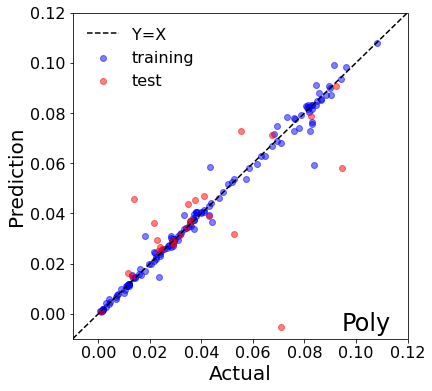

In [10]:
#1. 多项式回归

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

# 创建多项式回归的Pipeline
# Pipeline将多项式特征和线性回归结合
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # 多项式特征
    ('linear', LinearRegression())   # 线性回归
])

# 定义参数网格
param_grid_poly = {
    'poly__degree': [2, 3, 4]  # 多项式的度数
}

# 定义评分方法
scorer_poly = make_scorer(r2_score)  # 使用R2分数

# 创建GridSearchCV对象
grid_search_poly = GridSearchCV(estimator=pipeline, param_grid=param_grid_poly, scoring=scorer_poly, cv=10)

# 拟合数据
grid_search_poly.fit(X_train, y_train)

# 输出最优参数和对应的分数
print("Best parameters:", grid_search_poly.best_params_)
print("Best R2 score:", grid_search_poly.best_score_)

# 使用最优参数预测
best_poly = grid_search_poly.best_estimator_

# 使用最优模型进行预测
y_pred_train_poly = best_poly.predict(X_train)
y_pred_test_poly = best_poly.predict(X_test)

# 作图
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred_train_poly, alpha=0.5, color='b', label='training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_poly, alpha=0.5, color='r', label='test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'Poly', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('多项式回归_网格化搜索.tiff', dpi=720, bbox_inches='tight')

# 计算R2和均方误差
print('training R2 = %.3f' % best_poly.score(X_train, y_train))
print('test R2 = %.3f' % best_poly.score(X_test, y_test))
rmse_tr_poly = mean_squared_error(y_train, y_pred_train_poly, squared=False)  # 均方根误差
rmse_te_poly = mean_squared_error(y_test, y_pred_test_poly, squared=False)
print('RMSE(training)%.3f' % rmse_tr_poly)
print('RMSE(test)%.3f' % rmse_te_poly)


In [12]:
#2. Ridge 回归

from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

# 创建多项式回归的Pipeline，使用Ridge回归代替普通线性回归
pipeline_ridge = Pipeline([
    ('poly', PolynomialFeatures()),  # 多项式特征
    ('ridge', Ridge())  # Ridge 回归
])

# 定义参数网格，包括多项式度数和Ridge回归的正则化强度
param_grid_ridge = {
    'poly__degree': [2, 3],  # 降低多项式度数范围
    'ridge__alpha': [0.1, 1, 10, 100]  # Ridge正则化强度
}

# 定义评分方法
scorer_ridge = make_scorer(r2_score)

# 创建GridSearchCV对象
grid_search_ridge = GridSearchCV(estimator=pipeline_ridge, param_grid=param_grid_ridge, scoring=scorer_ridge, cv=10)

# 拟合数据
grid_search_ridge.fit(X_train, y_train)

# 输出最优参数和对应的分数
print("Best parameters:", grid_search_ridge.best_params_)
print("Best R2 score:", grid_search_ridge.best_score_)

# 使用最优参数预测
best_ridge = grid_search_ridge.best_estimator_

# 使用最优模型进行预测
y_pred_train_ridge = best_ridge.predict(X_train)
y_pred_test_ridge = best_ridge.predict(X_test)

# 计算 R2 和 RMSE
print('training R2 = %.3f' % best_ridge.score(X_train, y_train))
print('test R2 = %.3f' % best_ridge.score(X_test, y_test))
rmse_tr_ridge = mean_squared_error(y_train, y_pred_train_ridge, squared=False)
rmse_te_ridge = mean_squared_error(y_test, y_pred_test_ridge, squared=False)
print('RMSE(training): %.3f' % rmse_tr_ridge)
print('RMSE(test): %.3f' % rmse_te_ridge)


Best parameters: {'poly__degree': 3, 'ridge__alpha': 10}
Best R2 score: 0.20628781203182442
training R2 = 0.363
test R2 = 0.317
RMSE(training): 0.023
RMSE(test): 0.019


Best parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Best R2 score: 0.2804695780226423
training R2 = 0.630
test R2 = 0.620
RMSE(training) 0.017
RMSE(test) 0.014


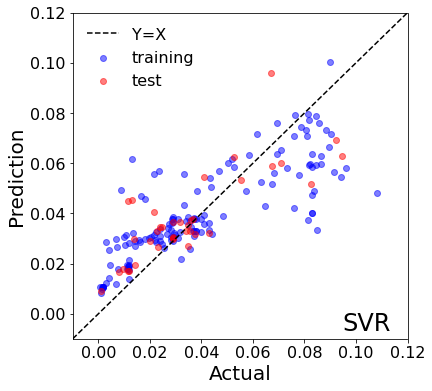

In [13]:
#3.支持向量机回归

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# 定义模型
svr = SVR()

# 定义要搜索的参数网格
param_grid_svr = {
    'kernel': ['linear', 'rbf'],  # 核函数
    'C': [0.1, 1, 10],  # 正则化参数
    'epsilon': [0.01, 0.1, 0.2]  # epsilon损失
}

# 定义评分方法
scorer_svr = make_scorer(r2_score)  # 使用R2分数

# 创建GridSearchCV对象
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, scoring=scorer_svr, cv=10)

# 拟合数据
grid_search_svr.fit(X_train, y_train)

# 输出最优参数和对应的分数
print("Best parameters:", grid_search_svr.best_params_)
print("Best R2 score:", grid_search_svr.best_score_)

# 使用最优参数预测
best_svr = grid_search_svr.best_estimator_

# 使用最优模型进行预测
y_pred_train_svr = best_svr.predict(X_train)
y_pred_test_svr = best_svr.predict(X_test)

# 作图
plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_svr, alpha = 0.5, color = 'b', label = 'training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_svr, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'SVR', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('支持向量回归_网格化搜索_不交叉验证.tiff', dpi = 720, bbox_inches='tight')

# 计算R2和均方误差
print('training R2 = %.3f' % best_svr.score(X_train, y_train))
print('test R2 = %.3f' % best_svr.score(X_test, y_test))
rmse_tr_svr = mean_squared_error(y_train, y_pred_train_svr, squared=False)  # 均方根误差
rmse_te_svr = mean_squared_error(y_test, y_pred_test_svr, squared=False)
print('RMSE(training) %.3f' % rmse_tr_svr)
print('RMSE(test) %.3f' % rmse_te_svr)


Best parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Best R2 score: 0.6025451194030618
training R2 = 1.000
test R2 = 0.577
RMSE(training) 0.000
RMSE(test) 0.015


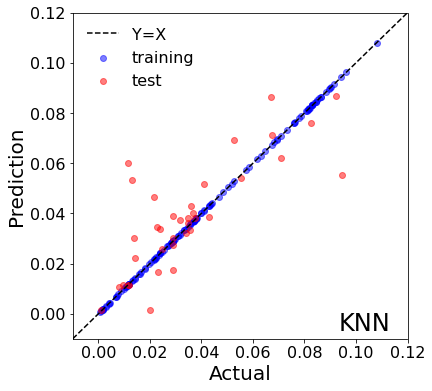

In [15]:
#4.K最近邻回归

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# 定义模型
knn = KNeighborsRegressor()

# 定义要搜索的参数网格
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # K值，最近邻居的个数
    'weights': ['uniform', 'distance'],  # 权重方式，'uniform'表示等权，'distance'表示距离加权
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # 搜索算法
}

# 定义评分方法
scorer_knn = make_scorer(r2_score)  # 使用R2分数

# 创建GridSearchCV对象
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, scoring=scorer_knn, cv=10)

# 拟合数据
grid_search_knn.fit(X_train, y_train)

# 输出最优参数和对应的分数
print("Best parameters:", grid_search_knn.best_params_)
print("Best R2 score:", grid_search_knn.best_score_)

# 使用最优参数预测
best_knn = grid_search_knn.best_estimator_

# 使用最优模型进行预测
y_pred_train_knn = best_knn.predict(X_train)
y_pred_test_knn = best_knn.predict(X_test)

# 作图
plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_knn, alpha = 0.5, color = 'b', label = 'training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_knn, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'KNN', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('K最近邻回归_网格化搜索_不交叉验证.tiff', dpi = 720, bbox_inches='tight')

# 计算R2和均方误差
print('training R2 = %.3f' % best_knn.score(X_train, y_train))
print('test R2 = %.3f' % best_knn.score(X_test, y_test))
rmse_tr_knn = mean_squared_error(y_train, y_pred_train_knn, squared=False)  # 均方根误差
rmse_te_knn = mean_squared_error(y_test, y_pred_test_knn, squared=False)
print('RMSE(training) %.3f' % rmse_tr_knn)
print('RMSE(test) %.3f' % rmse_te_knn)


Best parameters: {'alpha_1': 1e-06, 'alpha_2': 0.0001, 'lambda_1': 0.0001, 'lambda_2': 0.0001}
Best R2 score: 0.11612809790292318
training R2 = 0.353
test R2 = 0.233
RMSE(training) 0.023
RMSE(test) 0.020


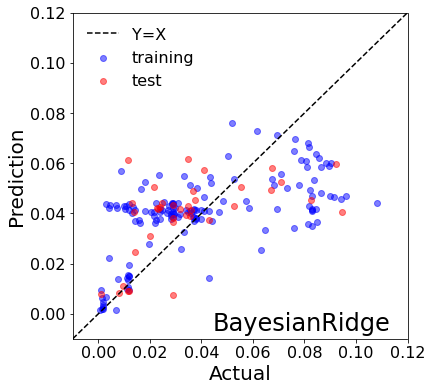

In [16]:
#5. 贝叶斯回归（Bayesian Regression）

from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# 定义贝叶斯回归模型
br = BayesianRidge()

# 定义要搜索的参数网格
param_grid_br = {
    'alpha_1': [1e-6, 1e-5, 1e-4],  # Alpha的先验分布的shape参数
    'alpha_2': [1e-6, 1e-5, 1e-4],  # Alpha的先验分布的scale参数
    'lambda_1': [1e-6, 1e-5, 1e-4],  # Lambda的先验分布的shape参数
    'lambda_2': [1e-6, 1e-5, 1e-4]   # Lambda的先验分布的scale参数
}

# 定义评分方法
scorer_br = make_scorer(r2_score)  # 使用R2分数

# 创建GridSearchCV对象
grid_search_br = GridSearchCV(estimator=br, param_grid=param_grid_br, scoring=scorer_br, cv=10)

# 拟合数据
grid_search_br.fit(X_train, y_train)

# 输出最优参数和对应的分数
print("Best parameters:", grid_search_br.best_params_)
print("Best R2 score:", grid_search_br.best_score_)

# 使用最优参数预测
best_br = grid_search_br.best_estimator_

# 使用最优模型进行预测
y_pred_train_br = best_br.predict(X_train)
y_pred_test_br = best_br.predict(X_test)

# 作图
plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_br, alpha = 0.5, color = 'b', label = 'training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_br, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'BayesianRidge', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('贝叶斯回归_网格化搜索_不交叉验证.tiff', dpi = 720, bbox_inches='tight')

# 计算R2和均方误差
print('training R2 = %.3f' % best_br.score(X_train, y_train))
print('test R2 = %.3f' % best_br.score(X_test, y_test))
rmse_tr_br = mean_squared_error(y_train, y_pred_train_br, squared=False)  # 均方根误差
rmse_te_br = mean_squared_error(y_test, y_pred_test_br, squared=False)
print('RMSE(training) %.3f' % rmse_tr_br)
print('RMSE(test) %.3f' % rmse_te_br)


Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Best R2 score: 0.2902451569473607
training R2 = 0.700
test R2 = 0.373
RMSE(training) 0.016
RMSE(test) 0.018


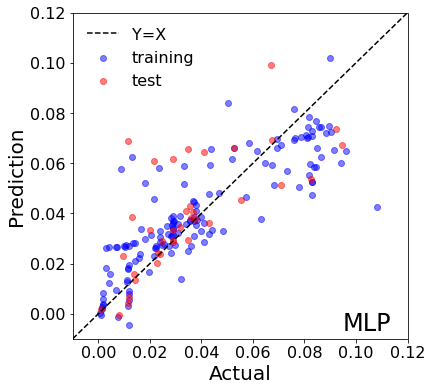

In [17]:
#6. 神经网络回归（Neural Network Regression）

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# 定义神经网络回归模型
mlp = MLPRegressor(max_iter=2000)

# 定义要搜索的参数网格
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # 隐藏层的结构
    'activation': ['relu', 'tanh'],  # 激活函数
    'solver': ['adam', 'lbfgs'],  # 优化算法
    'alpha': [0.0001, 0.001],  # L2正则化参数
    'learning_rate': ['constant', 'adaptive'],  # 学习率调整方式
}

# 定义评分方法
scorer_mlp = make_scorer(r2_score)  # 使用R2分数

# 创建GridSearchCV对象
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, scoring=scorer_mlp, cv=10)

# 拟合数据
grid_search_mlp.fit(X_train, y_train)

# 输出最优参数和对应的分数
print("Best parameters:", grid_search_mlp.best_params_)
print("Best R2 score:", grid_search_mlp.best_score_)

# 使用最优参数预测
best_mlp = grid_search_mlp.best_estimator_

# 使用最优模型进行预测
y_pred_train_mlp = best_mlp.predict(X_train)
y_pred_test_mlp = best_mlp.predict(X_test)

# 作图
plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_mlp, alpha = 0.5, color = 'b', label = 'training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_mlp, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'MLP', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('神经网络回归_网格化搜索_不交叉验证.tiff', dpi = 720, bbox_inches='tight')

# 计算R2和均方误差
print('training R2 = %.3f' % best_mlp.score(X_train, y_train))
print('test R2 = %.3f' % best_mlp.score(X_test, y_test))
rmse_tr_mlp = mean_squared_error(y_train, y_pred_train_mlp, squared=False)  # 均方根误差
rmse_te_mlp = mean_squared_error(y_test, y_pred_test_mlp, squared=False)
print('RMSE(training) %.3f' % rmse_tr_mlp)
print('RMSE(test) %.3f' % rmse_te_mlp)


Best parameters: {'alpha': 1, 'solver': 'sag'}
Best R2 score: 0.20857625317238232
training R2 = 0.349
test R2 = 0.236
RMSE(training) 0.023
RMSE(test) 0.020


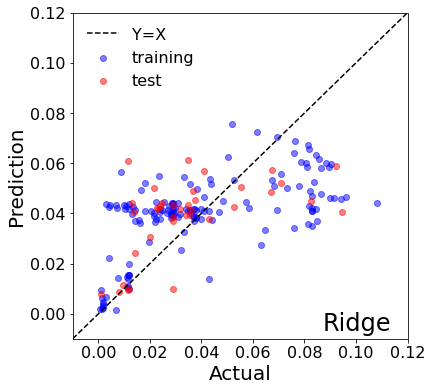

In [19]:
#7.广义线性模型（Generalized Linear Models, GLM）

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# 定义广义线性模型（岭回归）
ridge = Ridge()

# 定义要搜索的参数网格
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # 正则化强度，控制模型的复杂度
    'solver': ['auto', 'svd', 'cholesky', 'sparse_cg', 'sag', 'saga']  # 优化算法
}

# 定义评分方法
scorer_ridge = make_scorer(r2_score)  # 使用R2分数

# 创建GridSearchCV对象
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, scoring=scorer_ridge, cv=10)

# 拟合数据
grid_search_ridge.fit(X_train, y_train)

# 输出最优参数和对应的分数
print("Best parameters:", grid_search_ridge.best_params_)
print("Best R2 score:", grid_search_ridge.best_score_)

# 使用最优参数预测
best_ridge = grid_search_ridge.best_estimator_

# 使用最优模型进行预测
y_pred_train_ridge = best_ridge.predict(X_train)
y_pred_test_ridge = best_ridge.predict(X_test)

# 作图
plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_ridge, alpha = 0.5, color = 'b', label = 'training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_ridge, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'Ridge', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('广义线性模型_岭回归_网格化搜索.tiff', dpi=720, bbox_inches='tight')

# 计算R2和均方误差
print('training R2 = %.3f' % best_ridge.score(X_train, y_train))
print('test R2 = %.3f' % best_ridge.score(X_test, y_test))
rmse_tr_ridge = mean_squared_error(y_train, y_pred_train_ridge, squared=False)  # 均方根误差
rmse_te_ridge = mean_squared_error(y_test, y_pred_test_ridge, squared=False)
print('RMSE(training) %.3f' % rmse_tr_ridge)
print('RMSE(test) %.3f' % rmse_te_ridge)


Best parameters: {'alpha': 0.01, 'l1_ratio': 0.1}
Best R2 score: 0.0720550944944576
training R2 = 0.234
test R2 = 0.234
RMSE(training) 0.025
RMSE(test) 0.020


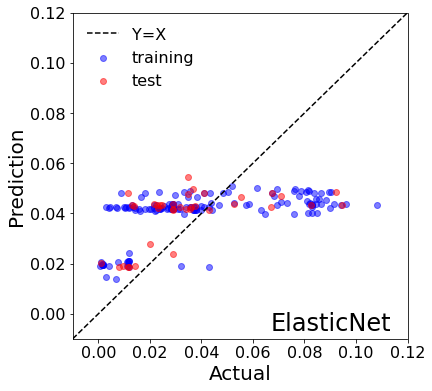

In [21]:
#8. 弹性网络回归（Elastic Net Regression）



from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# 定义弹性网络回归模型
elastic_net = ElasticNet(max_iter=5000)

# 定义要搜索的参数网格
param_grid_en = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # 正则化强度，控制模型的复杂度
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]  # L1 和 L2 的比例，1.0表示Lasso，0.0表示Ridge
}

# 定义评分方法
scorer_en = make_scorer(r2_score)  # 使用R2分数

# 创建GridSearchCV对象
grid_search_en = GridSearchCV(estimator=elastic_net, param_grid=param_grid_en, scoring=scorer_en, cv=10)

# 拟合数据
grid_search_en.fit(X_train, y_train)

# 输出最优参数和对应的分数
print("Best parameters:", grid_search_en.best_params_)
print("Best R2 score:", grid_search_en.best_score_)

# 使用最优参数预测
best_en = grid_search_en.best_estimator_

# 使用最优模型进行预测
y_pred_train_en = best_en.predict(X_train)
y_pred_test_en = best_en.predict(X_test)

# 作图
plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_en, alpha = 0.5, color = 'b', label = 'training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_en, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'ElasticNet', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('弹性网络回归_网格化搜索.tiff', dpi=720, bbox_inches='tight')

# 计算R2和均方误差
print('training R2 = %.3f' % best_en.score(X_train, y_train))
print('test R2 = %.3f' % best_en.score(X_test, y_test))
rmse_tr_en = mean_squared_error(y_train, y_pred_train_en, squared=False)  # 均方根误差
rmse_te_en = mean_squared_error(y_test, y_pred_test_en, squared=False)
print('RMSE(training) %.3f' % rmse_tr_en)
print('RMSE(test) %.3f' % rmse_te_en)


Best parameters: {'C': 1, 'epsilon': 0.01, 'gamma': 1, 'kernel': 'rbf'}
Best R2 score: 0.3218579193917013
training R2 = 0.674
test R2 = 0.650
RMSE(training) 0.016
RMSE(test) 0.014


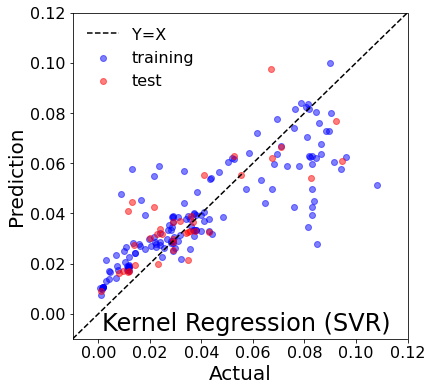

In [22]:
#9. 核回归（Kernel Regression）

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# 定义支持向量回归模型（模拟核回归）
svr = SVR()

# 定义要搜索的参数网格
param_grid_svr = {
    'kernel': ['rbf'],  # 核函数，使用径向基核RBF
    'C': [0.1, 1, 10, 100],  # 正则化参数，控制模型的复杂度
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # 核函数的系数
    'epsilon': [0.01, 0.1, 0.2]  # epsilon损失
}

# 定义评分方法
scorer_svr = make_scorer(r2_score)  # 使用R2分数

# 创建GridSearchCV对象
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, scoring=scorer_svr, cv=10)

# 拟合数据
grid_search_svr.fit(X_train, y_train)

# 输出最优参数和对应的分数
print("Best parameters:", grid_search_svr.best_params_)
print("Best R2 score:", grid_search_svr.best_score_)

# 使用最优参数预测
best_svr = grid_search_svr.best_estimator_

# 使用最优模型进行预测
y_pred_train_svr = best_svr.predict(X_train)
y_pred_test_svr = best_svr.predict(X_test)

# 作图
plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_svr, alpha = 0.5, color = 'b', label = 'training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_svr, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'Kernel Regression (SVR)', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('核回归_SVR_网格化搜索.tiff', dpi=720, bbox_inches='tight')

# 计算R2和均方误差
print('training R2 = %.3f' % best_svr.score(X_train, y_train))
print('test R2 = %.3f' % best_svr.score(X_test, y_test))
rmse_tr_svr = mean_squared_error(y_train, y_pred_train_svr, squared=False)  # 均方根误差
rmse_te_svr = mean_squared_error(y_test, y_pred_test_svr, squared=False)
print('RMSE(training) %.3f' % rmse_tr_svr)
print('RMSE(test) %.3f' % rmse_te_svr)
